# Lesson - Statistics and Probability VII: Weighted Mean and the Median

We have learned that the mean takes into account each value in the distribution, and we saw that it's fairly easy to define the mean algebraically. These two properties make the mean far superior to the median as a representative value of a distribution. The median comes in handy, however, when it's not possible or appropriate to compute the mean.

In this lesson we'll explore a couple of cases where neither the mean nor the median are suitable for finding an average value, and we'll learn an alternative summary metric: The mode.

In this lesson we will use the dataset `AmesHousing1.txt` for which documentation can be found [here](https://s3.amazonaws.com/dq-content/307/data_description.txt).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Setting pandas display options for large data
pd.options.display.max_rows = 200
pd.options.display.max_columns = 100

In [2]:
# Explore AmesHousing1.txt dataset
houses = pd.read_csv('AmesHousing_1.txt', sep = '\t')
print(houses.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 non-null   object 
 17  House Style   

### Exploring the documentation

From documentation, we can see that:

- The variable `Land Slope`: Slope of property is measured on `Ordinal scale`
		
       Gtl	Gentle slope
       Mod	Moderate Slope	
       Sev	Severe Slope
       
- The variable `Roof Style`: Type of roof is measured on `Nominal scale`

       Flat	Flat
       Gable	Gable
       Gambrel	Gabrel (Barn)
       Hip	Hip
       Mansard	Mansard
       Shed	Shed   
       
- The variable `Kitchen AbvGr` is `discrete` not `continuous`

In [6]:
# Check type of Kitchen AbvGr variable
print(houses['Kitchen AbvGr'].head())

0    1
1    1
2    1
3    1
4    1
Name: Kitchen AbvGr, dtype: int64


### The Mode for Ordinal Variables

We can see above that the `Land Slope variable` is ordinal and that the values of this variable are represented using words:

In [7]:
print(houses['Land Slope'].unique())

['Gtl' 'Mod' 'Sev']


'Gtl' means gentle slope, 'Mod' means moderate slope, and 'Sev' stands for 'Severe slope'. We can't compute the mean for this variable because its values are words. 

If we sort the values of the `Land Slope` variable, we can find that the middle two values are ['Gtl', 'Gtl'] (the variable has an even number of values). Although we can't take their mean, it's intuitively clear that the average of two identical values is one of those values, so the median value should be 'Gtl'.

However, if the two middle values were ['Gtl', 'Mod'], then it wouldn't be clear at all what to choose for the median. In cases like this, one workaround for finding an average value is to measure the most frequent value in the distribution. For the Land Slope variable, we can see that the value 'Gtl' has the greatest frequency:

In [8]:
print(houses['Land Slope'].value_counts())

Gtl    2789
Mod     125
Sev      16
Name: Land Slope, dtype: int64


We call the most frequent value in the distribution the **mode**. So the mode of the `Land Slope` variable is 'Gtl'. In other words, the typical house has a gentle slope. Very importantly, notice that the mode is the most frequent value in the distribution, not the frequency of that value — so the mode is 'Gtl', not 2789.

**Exercise**

Write a function that takes in an array of values (including strings) and returns the mode of that array. Inside the function's definition:

- Initialize an empty dictionary.
- Loop through the values of the array that the function takes in. For each iteration of the loop:

 - If the value is already a key in the dictionary we initialized before the loop, increment its dictionary value by 1.
 - Else, define the value as a key in the dictionary, and set the initial dictionary value to 1.
 - We should end up with a dictionary containing the unique values of the array as dictionary keys and the count for each unique value as a dictionary value: `example_dictionary = {'unique_value1': 230, 'unique_value2': 23, 'unique_value3': 328}`.

- Return the key with the highest count (this key is the mode of the array). For instance, for the `example_dictionary` above, we should return the string unique_value3.
- We can use the following technique to return the key corresponding to the highest value.

```
stats = {'a':1000, 'b':3000, 'c': 100}

max(stats, key=lambda key: stats[key])

```

or 

```
max(stats, key = stats.get)

```
Using the function, measure the mode of the `Land Slope` variable, and assign the result to a variable named `mode_function`.

Using the Series.mode() method, measure the mode of the Land Slope variable, and assign the result to a variable named `mode_method`.
Compare the two modes using the == operator to check whether they are the same and assign the result of the comparison to a variable named `same`.

In [9]:
# Checking method for getting the key with maximum value
stats = {'a':1000, 'b':3000, 'c': 100}

max(stats, key=lambda key: stats[key])

'b'

In [10]:
def get_mode(array):
    array_dict = {}
    
    for value in array:
        if value in array_dict:
            array_dict[value] += 1
        else:
            array_dict[value] = 1
    return  max(array_dict, key=lambda key: array_dict[key]) 

# mode for Land Slope variable using function above

mode_function = get_mode(houses['Land Slope'])
print(mode_function)

# mode for Land Slope variable using function above
mode_method = houses['Land Slope'].mode()
print(mode_method)

# checking whether mode_function and mode_method are equal
same = mode_function == mode_method
same

Gtl
0    Gtl
dtype: object


0    True
dtype: bool

### The Mode for Nominal Variables

Above, we have seen that the mode is ideal for ordinal data represented using words. The mode is also a good choice for nominal data. Let's consider the `Roof Style` variable, which is measured on a nominal scale and describes the roof type of a house:

In [11]:
print(houses['Roof Style'].value_counts())

Gable      2321
Hip         551
Gambrel      22
Flat         20
Mansard      11
Shed          5
Name: Roof Style, dtype: int64


We obviously can't compute the mean for this variable because the values are words. Even if they were coded as numbers, it'd be completely wrong to compute the mean because in the case of nominal variables the numbers describe qualities, not quantities.

Earlier, we made the case that we could compute the mean for ordinal variables if the values are numbers. This reasoning doesn't extend to nominal variables because they don't describe quantities, like ordinal variables do.

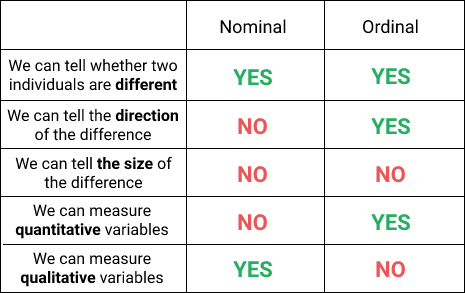

Also because the `Roof Style` variable is nominal, there's also no inherent order of the values in the distribution. This means that we can't sort the values in an ascending or descending order. The first step in computing the median is to sort the values in ascending order, which means we can't compute the median for the Roof Style variable.

**Exercise**

- Edit the function `get_mode` to return both the mode of an array and the dictionary (`array_dict`) containing the count for each unique value in the array.
- Use the edited function to return, at the same time, the mode of the `Roof Style` variable and the dictionary containing the counts for each unique value.

- Assign the mode to a variable named `mode`.
- Assign the dictionary to a variable named `value_counts`.
- Inspect the content of value_counts and compare it to the value count we'd get by using the `Series.value_counts()` method.

This exercise is meant to give us a better understanding of what happens under the hood when we run `Series.value_counts()`

In [14]:
def get_mode(array):
    array_dict = {}
    
    for value in array:
        if value in array_dict:
            array_dict[value] += 1
        else:
            array_dict[value] = 1
    value_counts = array_dict
    mode = max(array_dict, key=lambda key: array_dict[key])
    return  mode, value_counts 

# mode for Land Slope variable using function above

mode, value_counts = get_mode(houses['Roof Style'])
print(mode, value_counts)

print(houses['Roof Style'].value_counts()) 

Gable {'Hip': 551, 'Gable': 2321, 'Mansard': 11, 'Gambrel': 22, 'Shed': 5, 'Flat': 20}
Gable      2321
Hip         551
Gambrel      22
Flat         20
Mansard      11
Shed          5
Name: Roof Style, dtype: int64


### The Mode for Discrete Variables

There are some cases where computing the mean and the median is possible and correct, but the mode is preferred nonetheless. This is sometimes the case for discrete variables. Variables measured on interval or ratio scales can also be classified as discrete or continuous. A variable is discrete if there's no possible intermediate value between any two adjacent values. Let's take for instance the Kitchen AbvGr variable, which describes the number of kitchens in a house:

In [15]:
print(houses['Kitchen AbvGr'].value_counts().sort_index())

0       3
1    2796
2     129
3       2
Name: Kitchen AbvGr, dtype: int64


The median is 1 — a value much easier to grasp by non-technical people compared to 1.04. But this is a lucky case because the middle two values in the sorted distribution could have been [1,2], and then the median would have been 1.5. The mode is a safer choice for cases like this because it guarantees a whole number from the distribution.

The mode of the `Kitchen AbvGr` variable is 1. When we report this result, we should avoid technical jargon (like "mode" or "variable") and simply say that the typical house on the market has one kitchen.

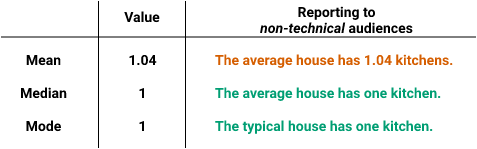

Note that the mode is also guaranteed to be a value from the distribution (this holds true for any kind of variable). This doesn't apply to the mean or the median, which can return values that are not present in the actual distribution. For instance, the mean of the Kitchen AbvGr is 1.04, but the value 1.04 is not present in the distribution.

The mean and the median generally summarize the distribution of a discrete variable much better than the mode, and we should use the mode only if we need to communicate your results to a non-technical audience.

Consider the `Bedroom AbvGr` and `SalePrice` variables below:
- first is discrete, while the latter is continuous
- Metrics for them are calculated below

In [16]:
houses['Bedroom AbvGr'].value_counts()

3    1597
2     743
4     400
1     112
5      48
6      21
0       8
8       1
Name: Bedroom AbvGr, dtype: int64

In [17]:
# Metrics for Kitchen AbvGr Variable
mean = houses['Bedroom AbvGr'].mean()
median = houses['Bedroom AbvGr'].median()
mode = houses['Bedroom AbvGr'].mode()
print(mean, median, mode)

2.8542662116040955 3.0 0    3
dtype: int64


In [19]:
# Metrics for SalePrice Variable
houses['SalePrice'].value_counts()

(87010.1, 161231.2]     1333
(161231.2, 235452.3]     908
(235452.3, 309673.4]     329
(12046.788, 87010.1]     146
(309673.4, 383894.5]     134
(383894.5, 458115.6]      51
(458115.6, 532336.7]      14
(532336.7, 606557.8]       9
(606557.8, 680778.9]       4
(680778.9, 755000.0]       2
Name: SalePrice, dtype: int64

In [20]:
mean = houses['SalePrice'].mean()
median = houses['SalePrice'].median()
mode = houses['SalePrice'].mode()
print(mean, median, mode)

180796.0600682594 160000.0 0    135000
dtype: int64


### Special Cases

There are distributions that can have more than one mode. Let's say we sampled the Kitchen AbvGr column and got this distribution of eight sample points:
$\begin{equation}
[0,1,1,1,2,2,2,3]
\end{equation}$

The two most frequent values are 1 and 2 (both occur in the distribution three times), which means that this distribution has two modes (1 and 2). For this reason, we call this distribution **bimodal** (the prefix "bi-" means "twice"). If the distribution had only one mode, we'd call it unimodal (the prefix "uni-" means "only one").

It's not excluded to have a distribution with more than two modes. Let's say we sampled from another column, `Bedroom AbvGr`, and got this distribution of 10 sample points:

$\begin{equation}
[0,1,1,2,2,3,3,4,4,8]
\end{equation}$

This distribution has four modes: 1, 2, 3, and 4 (each occurs twice in the distribution). When a distribution has more than two modes, we say that the distribution is **multimodal** (the prefix "multi-" means many).

We can also have cases when there is no mode at all. Let's say we sample again from the Bedroom AbvGr column and get this distribution of 8 sample points:
$\begin{equation}
[1,1,2,2,3,3,4,4]
\end{equation}$

Each unique value occurs twice in the distribution above, so there's no value (or values) that occurs more often than others. For this reason, this distribution doesn't have a mode. Contextually, we could say that there's no typical house on the market with respect to the number of bedrooms.

Distributions without a mode are often specific to continuous variables. It's quite rare to find two identical values in a continuous distribution (especially if we have decimal numbers), so the frequency of each unique value is usually 1. Even if we find identical values, their frequency is very likely to be too low to produce a meaningful mode value.

The workaround is to organize the continuous variable in a grouped frequency table, and select for the mode the midpoint of the class interval (the bin) with the highest frequency. This method has its limitations, but it generally gives reasonable answers.


**Exercise**

- Generate a grouped frequency table at equal interval of 100000 for `SalePrice` variable
- Find the class interval with the highest frequency, then find its midpoint. For instance, the midpoint of the class interval (0, 100000] is 50000.
 - Assign the midpoint value to a variable named mode. Make sure the value assigned is of the `int` type.
 - Find the mean of the SalePrice column and assign it to a variable named mean
 - Find the median of the SalePrice column and assign it to a variable named median.
 - Determine which metric among mean, median and modes are higher than others

In [21]:
# generate a grouped frequency table at equal interval of 1000000 for SalePrice variable
intervals = pd.interval_range(start = 0, end = 800000, freq = 100000)
gr_freq_table = pd.Series([0,0,0,0,0,0,0,0], index = intervals)

for value in houses['SalePrice']:
    for interval in intervals:
        if value in interval:
            gr_freq_table.loc[interval] += 1
            break

print(gr_freq_table)

(0, 100000]          252
(100000, 200000]    1821
(200000, 300000]     627
(300000, 400000]     166
(400000, 500000]      47
(500000, 600000]      11
(600000, 700000]       4
(700000, 800000]       2
dtype: int64


In [34]:
# Determining the mode
print(max(gr_freq_table))
mode_interval = (gr_freq_table.index)[1]/2
mode_interval  
mode = 50000+100000
mean = houses['SalePrice'].mean()
median = houses['SalePrice'].median()

print(mean, median, mode)

# The mode is lower than the median, and the median is lower than the mean.
# The mean is greater than the median, and the median is greater than the mode.

1821
180796.0600682594 160000.0 150000


### Skewed Distributions

When we plot a histogram or a kernel density plot to visualize the shape of a distribution, **the mode will always be the peak of the distribution**. In the code below, we plot a kernel density plot to visualize the shape of the SalePrice variable and:

- Set the limits of the x-axis using the `xlim` parameter — the lowest limit is the minimum value in the SalePrice variable, and the upper limit is the maximum value.
- Plot a vertical line to indicate the position of the mode (note that our estimate of 150000 from the last exercise is quite close to the peak of the distribution).

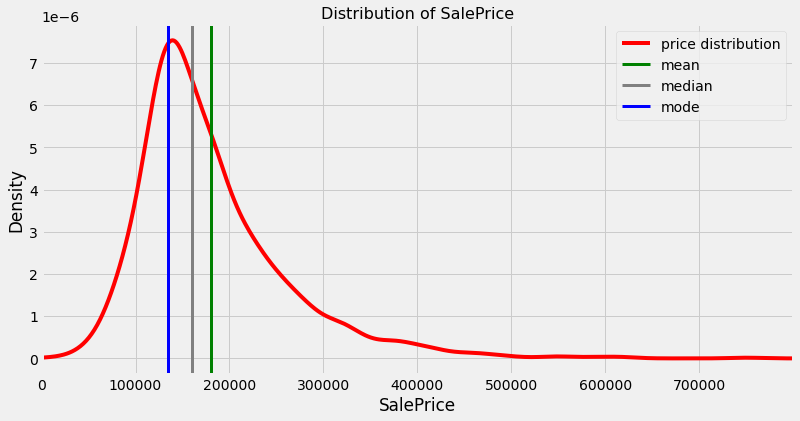

In [44]:
fig = plt.figure(figsize=(12, 6))
from numpy import arange
plt.style.use('fivethirtyeight')
houses['SalePrice'].plot.kde(label = 'price distribution', legend = True, color = 'red', xticks = arange(0, 800000, 100000)  )

# lines indicating mean, median and mode
plt.axvline(x = houses['SalePrice'].mean(), ymin = 0, ymax = 1, label = 'mean', linewidth = 3, color = 'green')
plt.axvline(x = houses['SalePrice'].median(), ymin = 0, ymax = 1, label = 'median', linewidth = 3, color = 'grey')
plt.axvline(x = houses['SalePrice'].mode()[0], ymin = 0, ymax = 1, label = 'mode', linewidth = 3, color = 'blue')
plt.xlim(0,800000)
plt.legend()
plt.xlabel('SalePrice')
plt.title("Distribution of SalePrice", fontsize = 16)
plt.show()

Above distribution is clearly right skewed. Generally, the location of the mode, median and mean is predictable for a right-skewed distribution:

- Most values are concentrated in the left body of the distribution where they will form a peak — this is where the mode will be.
- Remember that the median divides a distribution in two halves of equal length. For this reason, the median is usually positioned slightly right from the peak (the mode) for a right-skewed distribution.
- The mean takes into account each value in the distribution, and it will be affected by the outliers in the right tail. This will generally pull the mean to the right of the median.

So in a right-skewed distribution, the mean will usually be to the right of the median, and the median will be to the right of the mode.


For a left-skewed distribution, the direction is simply reversed: the mean is positioned to the left of the median, and the median to the left of the mode. This is obvious on the distribution of the `Year Built` variable:

In [40]:
print(houses['Year Built'].mode())

0    2005
dtype: int64


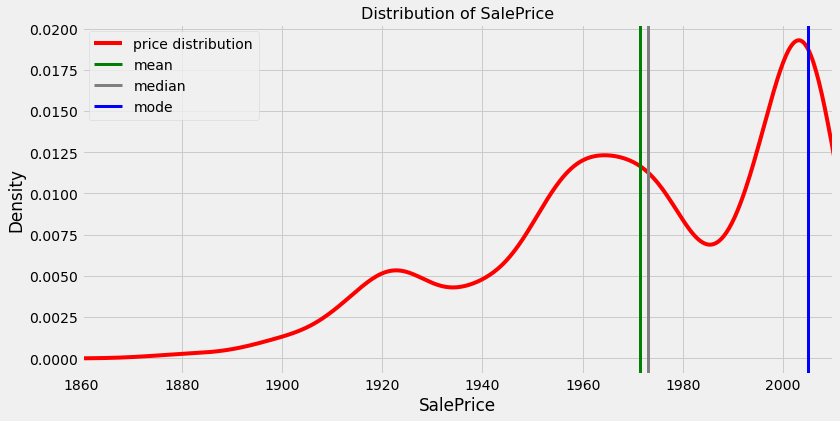

In [42]:
fig = plt.figure(figsize=(12, 6))
from numpy import arange
plt.style.use('fivethirtyeight')
houses['Year Built'].plot.kde(label = 'price distribution', legend = True, color = 'red', xticks = arange(1860, 2010, 20))

# lines indicating mean, median and mode
plt.axvline(x = houses['Year Built'].mean(), ymin = 0, ymax = 1, label = 'mean', linewidth = 3, color = 'green')
plt.axvline(x = houses['Year Built'].median(), ymin = 0, ymax = 1, label = 'median', linewidth = 3, color = 'grey')
plt.axvline(x = houses['Year Built'].mode()[0], ymin = 0, ymax = 1, label = 'mode', linewidth = 3, color = 'blue')
plt.xlim(1860,2010)
plt.legend()
plt.xlabel('SalePrice')
plt.title("Distribution of SalePrice", fontsize = 16)
plt.show()

### Symmetrical Distributions

The location of the mean, median, and mode are also predictable for symmetrical distributions.
- The median divides the distribution in two equal halves. As a consequence, the median will always be at the center of a perfectly symmetrical distribution because only a line drawn at the center can divide the distribution in two equal halves.

- For a perfectly symmetrical distribution, the two equal halves will bear the same weight when computing the mean because the mean takes into account equally each value in the distribution. The mean is not pulled neither to the left, nor to the right, and stays instead in the center, at the same location as the median. The mean and the median are always equal for any perfectly symmetrical distribution.

- Although the mean and the median have a constant location for every symmetrical distribution (no matter the shape), the location of the mode can change. The mode is where the peak is, so for a normal distribution the mode will be at the center, right where the mean and the median are.

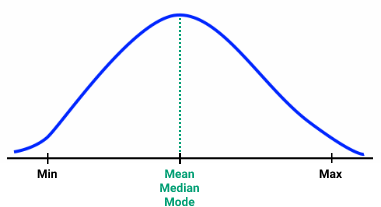

It's possible to have a symmetrical distribution with more than one peak, which means that the mode won't be at the center:

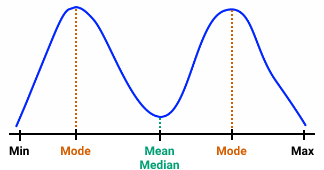

A uniform distribution doesn't have any peaks, which means it doesn't have any mode:

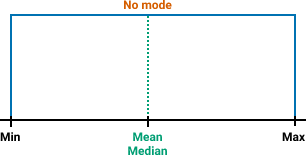

Below, we plot a kde for `Mo Sold` variable (which describes the month of a sale) is close to normal, where it can be seen that the mean, median and modes are nearly collocated:

- Plot a kernel density plot for this distribution using Series.plot.kde().
- The lower boundary of the x-axis should be 1 and the upper one 12. You can use the xlim parameter of the Series.plot.kde() method.
Plot three vertical lines:
- One for the mode — the color of the line should be green and its label should be 'Mode'.
- One for the median — the color of the line should be orange and its label should be 'Median'.
- One for the mean — the color of the line should be black and its label should be 'Mean'.
- Display all the labels using a legend (activate the legend using `plt.legend()`).
- We should observe the mean, the median, and the mode clustered together in the center of the distribution.

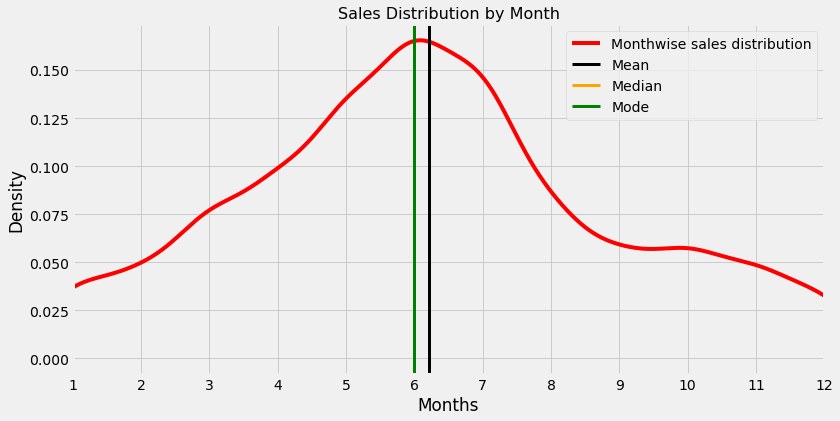

In [46]:
fig = plt.figure(figsize=(12, 6))
from numpy import arange
plt.style.use('fivethirtyeight')
houses['Mo Sold'].plot.kde(label = 'Monthwise sales distribution', legend = True, color = 'red', xticks = arange(1, 13, 1))

# lines indicating mean, median and mode
plt.axvline(x = houses['Mo Sold'].mean(), ymin = 0, ymax = 1, label = 'Mean', linewidth = 3, color = 'black')
plt.axvline(x = houses['Mo Sold'].median(), ymin = 0, ymax = 1, label = 'Median', linewidth = 3, color = 'orange')
plt.axvline(x = houses['Mo Sold'].mode()[0], ymin = 0, ymax = 1, label = 'Mode', linewidth = 3, color = 'green')
plt.xlim(1,12)
plt.legend()
plt.xlabel('Months')
plt.title("Sales Distribution by Month", fontsize = 16)
plt.show()

# Below, median line iw not visible as it is hidden by mean line

### Summary

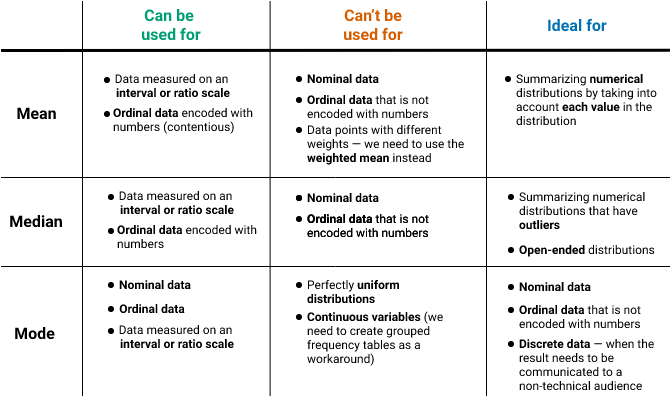